### Challenge 1

**Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like:**

**{('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }**

In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import random
import math
from pprint import pprint
import matplotlib.cm as cm


The commands below will give you copies of the files needed to run the project. 

In [1]:
!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt > turndata0627.txt
!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt > turndata0620.txt
!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_150613.txt > turndata0613.txt
!curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt > turndata0606.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.0M    0 24.0M    0     0   259k      0 --:--:--  0:01:35 --:--:--  589k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.1M    0 24.1M    0     0   325k      0 --:--:--  0:01:15 --:--:--  154k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.8M    0 23.8M    0     0   263k      0 --:--:--  0:01:32 --:--:--  576k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0   223k      0 --:--:--  0:01:49 --:--:-- 91269


I'm going to use `pandas` to do everything here. The basic import statement is below, along with a line to handle warnings about changing the data in a particular frame.


In [2]:
raw_data = pd.read_csv("turndata0627.txt")

# the below is a warning about changing values in a DF. I want to change values. I don't listen to the warnings
pd.options.mode.chained_assignment = None   

In order to preserve my own sanity, I'm going to clean the data first, because the turnstile counters are not a good way of ascertaining counts.


In [3]:
#initial data cleaning to eliminate turnstile default vals  
def clean_data(inp):
    data = inp.copy(deep="True")
    data['ENTRIES2'] = 0
    
    # remove 
    for i in range(1, len(data)):
        
        if data['SCP'][i] == data['SCP'][i-1]:
            data['ENTRIES2'][i] = data['ENTRIES'][i] - data['ENTRIES'][i-1]
    
    for i in range(0, len(data)):
        # fix values that are too high or too low                                                               
        if data['ENTRIES2'][i] > 5000:
            data['ENTRIES2'][i] = 0 # try this instead of plain old zero
        if data['ENTRIES2'][i] < 0:
            data['ENTRIES2'][i] = 0
    
    # overwrite original ENTRIES data because it's not useful
    data['ENTRIES'] = data['ENTRIES2']
    return data.copy(deep="True")

df = clean_data(raw_data)

Now, for the dictionary part:

In [4]:
dict = {}

for index, row in df.iterrows():
    #grab row                                                                                   \
                                                                                                 
    r = row.values.tolist()
    key = tuple(r[:4])
    value = r[4:11]

    #add to or update dict                                                                       
    if key in dict:
        dict[key].append(value)
    else:
        dict[key] = [value]
# test                                                                                                                                       
pprint(dict[('A002','R051','02-00-00','LEXINGTON AVE')])                  

[['NQR456', 'BMT', '06/20/2015', '00:00:00', 'REGULAR', 0, 1756572],
 ['NQR456', 'BMT', '06/20/2015', '04:00:00', 'REGULAR', 50, 1756580],
 ['NQR456', 'BMT', '06/20/2015', '08:00:00', 'REGULAR', 18, 1756609],
 ['NQR456', 'BMT', '06/20/2015', '12:00:00', 'REGULAR', 102, 1756706],
 ['NQR456', 'BMT', '06/20/2015', '16:00:00', 'REGULAR', 216, 1756776],
 ['NQR456', 'BMT', '06/20/2015', '20:00:00', 'REGULAR', 364, 1756837],
 ['NQR456', 'BMT', '06/21/2015', '00:00:00', 'REGULAR', 159, 1756875],
 ['NQR456', 'BMT', '06/21/2015', '04:00:00', 'REGULAR', 26, 1756882],
 ['NQR456', 'BMT', '06/21/2015', '08:00:00', 'REGULAR', 26, 1756900],
 ['NQR456', 'BMT', '06/21/2015', '12:00:00', 'REGULAR', 72, 1756954],
 ['NQR456', 'BMT', '06/21/2015', '16:00:00', 'REGULAR', 219, 1757011],
 ['NQR456', 'BMT', '06/21/2015', '20:00:00', 'REGULAR', 233, 1757055],
 ['NQR456', 'BMT', '06/22/2015', '00:00:00', 'REGULAR', 124, 1757100],
 ['NQR456', 'BMT', '06/22/2015', '04:00:00', 'REGULAR', 11, 1757103],
 ['NQR456', 'B

### Challenge 2

**Let's turn this into a time series.**

**For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.**

**This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.**

**Your new dict should look something like**

**{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }**

In [5]:
dict = {}

for index, row in df.iterrows(): 
    #grab row                   
    
    r = row.values.tolist()
    key = tuple(r[:4])
    date = datetime.strptime(str(r[6]) + " " + str(r[7]), "%m/%d/%Y %H:%M:%S")
    entry = r[9]
    value = [date, entry]
    
#for i in len(data)-1:    
    #add to or update dict                                                                                                 
    if key in dict:
        dict[key].append(value)
    else:
        dict[key] = [value]
# test                                                  
# pprint(dict.keys())
pprint(dict[('A002','R051','02-00-00','LEXINGTON AVE')])


[[datetime.datetime(2015, 6, 20, 0, 0), 0],
 [datetime.datetime(2015, 6, 20, 4, 0), 50],
 [datetime.datetime(2015, 6, 20, 8, 0), 18],
 [datetime.datetime(2015, 6, 20, 12, 0), 102],
 [datetime.datetime(2015, 6, 20, 16, 0), 216],
 [datetime.datetime(2015, 6, 20, 20, 0), 364],
 [datetime.datetime(2015, 6, 21, 0, 0), 159],
 [datetime.datetime(2015, 6, 21, 4, 0), 26],
 [datetime.datetime(2015, 6, 21, 8, 0), 26],
 [datetime.datetime(2015, 6, 21, 12, 0), 72],
 [datetime.datetime(2015, 6, 21, 16, 0), 219],
 [datetime.datetime(2015, 6, 21, 20, 0), 233],
 [datetime.datetime(2015, 6, 22, 0, 0), 124],
 [datetime.datetime(2015, 6, 22, 4, 0), 11],
 [datetime.datetime(2015, 6, 22, 8, 0), 44],
 [datetime.datetime(2015, 6, 22, 12, 0), 219],
 [datetime.datetime(2015, 6, 22, 16, 0), 303],
 [datetime.datetime(2015, 6, 22, 20, 0), 909],
 [datetime.datetime(2015, 6, 23, 0, 0), 252],
 [datetime.datetime(2015, 6, 23, 4, 0), 23],
 [datetime.datetime(2015, 6, 23, 7, 58, 11), 62],
 [datetime.datetime(2015, 6, 23

### Challenge 3

**These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.**

In [6]:
'''
Same as the first one but with converted datetimes
'''
dict = {}
series = df.groupby(['C/A','UNIT','SCP','STATION','DATE'])['ENTRIES'].sum()

for row in series.iteritems():
    
    r = list(row)
    key = tuple(list(r[0])[:4])
    date = datetime.strptime(row[0][4], "%m/%d/%Y")
    entry = r[1]
    value = [date, entry]
    
    #add to or update dict
    if key in dict:
        dict[key].append(value)
    else:
        dict[key]=[value]

# test                                                                                                                                       
pprint(dict[('A002','R051','02-00-00','LEXINGTON AVE')])

[[datetime.datetime(2015, 6, 20, 0, 0), 750],
 [datetime.datetime(2015, 6, 21, 0, 0), 735],
 [datetime.datetime(2015, 6, 22, 0, 0), 1610],
 [datetime.datetime(2015, 6, 23, 0, 0), 1771],
 [datetime.datetime(2015, 6, 24, 0, 0), 1967],
 [datetime.datetime(2015, 6, 25, 0, 0), 2203],
 [datetime.datetime(2015, 6, 26, 0, 0), 1931]]


### Challenge 4

**We will plot the daily time series for a turnstile.**

To do this, all we need to do is plot the data mapped into the values of the array in part 3.
By picking a random turnstyle, we can get a feel for how many people use one of these per day.

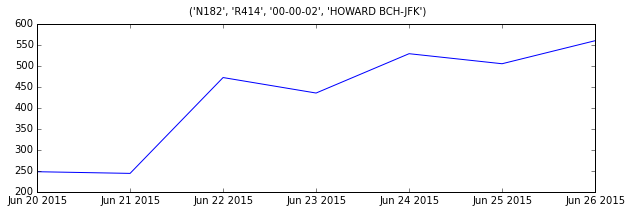

In [7]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
turn_name = random.choice(dict.keys())
turn = dict[turn_name] # return data for a random turnstile
dates = [x[0] for x in turn]
entries = [x[1] for x in turn]
plt.figure(figsize=(10,3)).suptitle(str(turn_name))
plt.plot(dates, entries)

### Challenge 5

**So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.**

In [8]:
'''
Create dictionary object mapping total entries per day to the associate turnstile combo
'''

series = df.groupby(['C/A','UNIT','STATION','DATE'])['ENTRIES'].sum()
dict = {}

for row in series.iteritems():

    #grab row                                                                                                        
    r = list(row)
    date = list(r[0]).pop()
    key = tuple(list(r[0])[:3])
    entry = r[1]
    value = [date, entry]

    #add to or update dict                                                                                           
    if key in dict:
        dict[key].append(value)
    else:
        dict[key]=[value]

# test                                                                                                               
pprint(dict[('A002','R051','LEXINGTON AVE')])

[['06/20/2015', 8547],
 ['06/21/2015', 8319],
 ['06/22/2015', 16363],
 ['06/23/2015', 17951],
 ['06/24/2015', 18163],
 ['06/25/2015', 18610],
 ['06/26/2015', 18445]]


### Challenge 6

**Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.**

In [9]:
series = df.groupby(['STATION','LINENAME','DATE'])['ENTRIES'].sum()

def station_map(series):
    '''Make a dictionary of STATION[date, count] pairs for a given series'''
    dict = {}
    for row in series.iteritems():

        #grab row data 
        date = datetime.strptime(row[0][2], '%m/%d/%Y')
        key = str(row[0][0]) + " " + str(row[0][1])
        entry = row[1]
        value = [date, entry]

        #add to or update dict                                                                                           
        if key in dict:
            dict[key].append(value)
        else:
            dict[key]=[value]
    return dict

weekly_station_map = station_map(series)
# test
# pprint(weekly_station_map)                                                                                       

{'1 AVE L': [[datetime.datetime(2015, 6, 20, 0, 0), 14703],
             [datetime.datetime(2015, 6, 21, 0, 0), 15627],
             [datetime.datetime(2015, 6, 22, 0, 0), 21936],
             [datetime.datetime(2015, 6, 23, 0, 0), 23640],
             [datetime.datetime(2015, 6, 24, 0, 0), 23868],
             [datetime.datetime(2015, 6, 25, 0, 0), 24610],
             [datetime.datetime(2015, 6, 26, 0, 0), 25988]],
 '103 ST 1': [[datetime.datetime(2015, 6, 20, 0, 0), 8582],
              [datetime.datetime(2015, 6, 21, 0, 0), 8100],
              [datetime.datetime(2015, 6, 22, 0, 0), 13203],
              [datetime.datetime(2015, 6, 23, 0, 0), 13378],
              [datetime.datetime(2015, 6, 24, 0, 0), 13720],
              [datetime.datetime(2015, 6, 25, 0, 0), 13763],
              [datetime.datetime(2015, 6, 26, 0, 0), 13540]],
 '103 ST 6': [[datetime.datetime(2015, 6, 20, 0, 0), 4482],
              [datetime.datetime(2015, 6, 21, 0, 0), 3887],
              [datetime.datetime(

### Challenge 7

**Plot the time series for a station.**

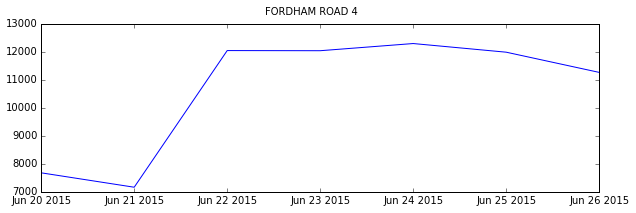

In [10]:
stn_name = random.choice(weekly_station_map.keys()) # choose a random station
station = weekly_station_map[stn_name] # grap the associated dictionary values
dates = [x[0] for x in station]
entries = [x[1] for x in station]
plt.figure(figsize=(10,3)).suptitle(str(stn_name), fontsize='10')
plt.plot(dates, entries)

###Challenge 8

**Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.**

We're going to need more data for the second part of that! Lets import some more files and clean them.

In [11]:
raw_data0620 = pd.read_csv("turndata0620.txt", low_memory=False) 
raw_data0613 = pd.read_csv("turndata0613.txt", low_memory=False)
raw_data0606 = pd.read_csv("turndata0606.txt", low_memory=False)

In [12]:
week1 = clean_data(raw_data0620) 
week2 = clean_data(raw_data0613)
week3 = clean_data(raw_data0606)

In [13]:
STATION = random.choice(weekly_station_map.keys()) # choose a random station

def weekmap(dictionary):
    # store vals in weeks dict                                                               
    weeks = {'Sunday': 0,
             'Monday': 0,
             'Tuesday': 0,
             'Wednesday': 0,
             'Thursday': 0,
             'Friday': 0,
             'Saturday': 0
             }
    # this dictionary maps the indices of the list weeks.keys to the actual order of the data
    days = {1: 'Sunday',
            2: 'Monday',
            3: 'Tuesday',
            4: 'Wednesday',
            5: 'Thursday',
            6: 'Friday',
            0: 'Saturday'
            }

    day = 0
    day_index = ''
    for key in weeks.keys():
        day_index = days[day] # guarantee you're picking the right day by actually calling the day, not a number                      
        weeks[day_index] = dictionary[STATION][day][1]
        day += 1
    return weeks

# test
initial_weekmap = weekmap(weekly_station_map)
print(STATION, initial_weekmap)

('KINGSTON AVE 3', {'Monday': 5288, 'Tuesday': 5152, 'Friday': 5167, 'Wednesday': 5107, 'Thursday': 5006, 'Sunday': 3560, 'Saturday': 2301})


Now lets do this again for the other weeks!

In [14]:
# get series
series1 = week1.groupby(['STATION','LINENAME','DATE'])['ENTRIES'].sum()
series2 = week2.groupby(['STATION','LINENAME', 'DATE'])['ENTRIES'].sum()
series3 = week3.groupby(['STATION','LINENAME','DATE'])['ENTRIES'].sum()

# now get a weekly map
weekly_station_map1 = station_map(series1)
weekly_station_map2 = station_map(series2)
weekly_station_map3 = station_map(series3)

# now transform them to days of the week
weekmap1 =  weekmap(weekly_station_map1)
weekmap2 =  weekmap(weekly_station_map2)
weekmap3 =  weekmap(weekly_station_map3)

Now we can compine all of these "week maps" into a single plot

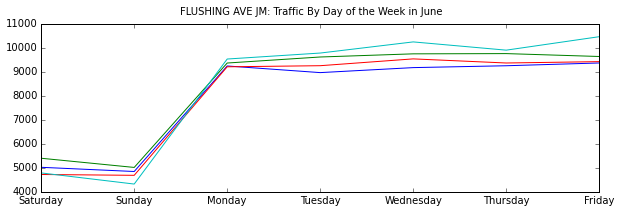

In [21]:
stn_name = random.choice(weekly_station_map.keys()) # choose a random station
plt.figure(figsize=(10,3)).suptitle(str(stn_name), fontsize='10')
colors=iter(cm.rainbow(np.linspace(0,1,4))) 

all_weeks = [weekly_station_map, weekly_station_map1, weekly_station_map2, weekly_station_map3]
stn_name = random.choice(weekly_station_map.keys()) # choose a random station
plt.figure(figsize=(10,3)).suptitle(str(stn_name) + ": Traffic By Day of the Week in June", fontsize='10')

for i in all_weeks:
    station = i[stn_name] # grab the associated dictionary values
    dates = [x[0].weekday() for x in station]
    dates = dates[2:] + dates[:2]
    entries = [x[1] for x in station]
    plt.xticks(dates, ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.plot(dates, entries)

### Challenge 9

**Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate**

Lets start by transforming the data from the above into a concatenated `df` object. 

In [18]:
file_list = []
total_df = None
file_list.append(df)
file_list.append(week1)
file_list.append(week2)
file_list.append(week3)
total_df = pd.concat(file_list)

In [19]:
month_data = total_df.groupby(['STATION', 'LINENAME'])['ENTRIES'].sum()
totals = {}

for row in month_data.iteritems():                          
    key = str(str(row[0][0]) + " " + str(row[0][1])) # combine station and linename to be more easily read
    value = row[1]
    if key in totals:
        totals[key] += value
    else:
        totals[key] = value
        
sorted_total = sorted(totals.items(), key=lambda x: (-x[1], x[0])) 
pprint(sorted_total[:20])

[('42 ST-GRD CNTRL 4567S', 3794145),
 ('34 ST-HERALD SQ BDFMNQR', 2981461),
 ('42 ST-TIMES SQ 1237ACENQRS', 2267054),
 ('34 ST-PENN STA ACE', 2113730),
 ('42 ST-PA BUS TE ACENQRS1237', 2035646),
 ('14 ST-UNION SQ LNQR456', 1872189),
 ('86 ST 456', 1677565),
 ('MAIN ST 7', 1505029),
 ('47-50 ST-ROCK BDFM', 1438333),
 ('59 ST-COLUMBUS ABCD1', 1419023),
 ('34 ST-PENN STA 123ACE', 1404199),
 ('59 ST 456NQR', 1268614),
 ('ROOSEVELT AVE EFMR7', 1265686),
 ('CANAL ST JNQRZ6', 1207373),
 ('PATH WTC 1', 1112510),
 ('W 4 ST-WASH SQ ABCDEFM', 1084845),
 ('96 ST 123', 1062409),
 ('72 ST 123', 1058588),
 ('LEXINGTON-53 ST EM6', 1049006),
 ('JAMAICA CENTER EJZ', 1010915)]


### Challenge 10

**Make a single list of these total ridership values and plot it with plt.hist(total_ridership_counts)to get an idea about the distribution of total ridership among different stations.**

**This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.**


(array([ 366.,   74.,   19.,    7.,    2.,    3.,    0.,    1.,    0.,    1.]),
 array([  3.78100000e+03,   3.82817400e+05,   7.61853800e+05,
          1.14089020e+06,   1.51992660e+06,   1.89896300e+06,
          2.27799940e+06,   2.65703580e+06,   3.03607220e+06,
          3.41510860e+06,   3.79414500e+06]),
 <a list of 10 Patch objects>)

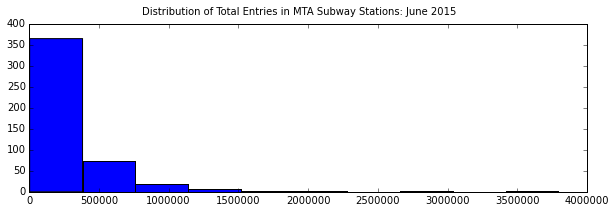

In [20]:
total_ridership_counts = totals.values()
plt.figure(figsize=(10,3)).suptitle(str('Distribution of Total Entries in MTA Subway Stations: June 2015'), fontsize='10')
plt.hist(total_ridership_counts)